<a href="https://colab.research.google.com/github/Kelvin-ndungu/Kelvin-ndungu/blob/main/data_analysis_keywords_resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the project

Most projects focus on the core technical skills required for data analysis jobs eg SQL, Python/R, Excel/Google Sheets, and Tableau/Power Bi, and fail to focus on where the clients need most help. 

This project will analyse data analysis job postings for the most common words  that are used by recruiters. 

These words can be used in your resume to increase your chances of being shortlisted for an interview

For the project we will remove any puncuations, conjuctions, pronouns, and prepositions and visualize the result in a word cloud.  

The project will utilize job posting from Kaggle (https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs)




---


# Creating the variables with words that will be removed



---

Some of the words that will removed, include any prepositions, pronouns, punctuations, and conjunctions.  

In [6]:
#create variables to hold lists of punctuations, prepositions, conjuctions, and pronons 

#variable holding all punctuations
punctuation_list = [",", ".", "?", "-", "!",":", ";","{", "}", "(", ")", "[", "]", "...", "_"]

#creating a list from a text from a string using split() function

#a list containing pronouns(109)
pronoun_list = "all another,any,anybody,anyone,anything,as,aught,both,each,each other,either,enough,everybody,everyone,everything,few,he,her,hers,herself,him,himself,his,I,idem,it,its,itself,many,me,mine,most,my,myself,naught,neither,no one,nobody,none,nothing,one,one another,other,others,ought,our,ours,ourself,ourselves,several,she,some,somebody,someone,something,somewhat,such,suchlike,that,thee,their,theirs,theirself,theirselves,them,themself,themselves,there,these,they,this,those,us,we,what,whatever,whatnot,whatsoever,whence,where,whereby,wherefrom,wherein,whereinto,whereof,wheresoever,whereto,whereunto,wherever,wherewith,wherewithal,whether,which,whichever,whichsoever,who,whoever,whom,whomever,whomso,whomsoever,whose,whosesoever,whosever,whosoever,you,your,yours,yourself,yourselves".split(",")

#a list containing prepositions(103)
preposition_list = "abroad,about,above,according to,across,after,against,ago,ahead of,along,amidst,among,amongst,apart,around,as,as far as,as well as,aside,at,away,barring,because of,before,behind,below,beneath,beside,besides,between,beyond,but,by,by means of,circa,concerning,despite,down,due to,during,in,in accordance with,in addition to,in case of,in front of,in lieu of,in place of,in spite of,in to,inside,instead of,into,except,except for,excluding,for,following,from,hence,like,minus,near,next,next to,past,per,prior to,round,off,on,on account of,on behalf of,on to,on top of,onto,opposite,out,out from,out of,outside,over,owing to,than,through,throughout,till,times,to,toward,towards,under,underneath,unlike,until,unto,up,upon,via,with,with a view to,within,without,worth".split(",")

#a list containing conjuctions
conjuction_list = "and,for,not,but,or,yes,so,both,not only,but also,either,neither,just,the,as,if,then,than,rather,no sooner,such,after,although,as if,as long as,as much as,as soon as,as far as,as though,by the time,in as much as,inasmuch,in order to,in order that,in case,lest,though,now that,now since,now when,now,even if,even,even though,provided,provide that,if then,if when,if only,just as,where,wherever,whereas,where if,whether,since,because,whose,whoever,unless,while,before,why,so that,until,how,till,whenever,supposing,when,or not,what".split(",")

#combining all words that needs to be removed

remove_list = pronoun_list[:]
remove_list.extend(preposition_list)
remove_list.extend(conjuction_list)
len(remove_list) #Returns a total of 285 words that will have to be removed.

285



---

This section will set up the environment and create a variable to hold the text to be analyzed.


In [7]:
#loading all the important libraries
import pandas as pd #for reading csv file
from wordcloud import WordCloud #for creating a wordcloud
import matplotlib.pyplot as plt
%matplotlib inline



#reading the CSV file. 
#the "index_col = 0" stipulates that we will not read the row name/index
analyst_df = pd.read_csv("/content/drive/MyDrive/Colab files/DataAnalyst.csv", index_col = 0)

#use head() to look at the first five rows of the data set
#analyst_df.head()

#we rename the Job Descriprion column to job_description

analyst_df.rename(columns = {"Job Description":"job_description"}, inplace = True)
#analyst_df.head()


#we join the all the variables in the job_description column

description = " ".join(desc for desc in analyst_df.job_description)




---

Next we work on replacing all puncuations, pronouns, conjuctions, and prepositions. 

We will start with punctuations, and then we will work on the other words that needs to be removed. 

In addition, this section will visualize and save the wordcloud as a file

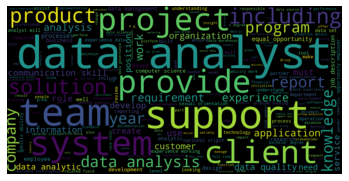

In [8]:
#import files to facilitate us save the wordcloud
from google.colab import files

#create a for loop to scan for a replace a puncuation in the text


for x in punctuation_list:
  description_final = description.replace(x, " ")



#create another for loop to remove the remove_list(pronouns, conjuctions, and prepositions)

for y in remove_list:
  description_final = description_final.replace((" "+y+ " "), " ") #add the spaces to ensure that characters in between words are not replaced


#generate a wordcloud
#the .lower() function helps put all the words in lowercase to avoid duplication of words

wordcloud = WordCloud( width= 1600, height = 800).generate(description_final.lower())

plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("/content/sample_data/wordcloud2.png")
#create a dictionary that will hold the unique words and their frequency
#if need be, you can convert the dictionary to a dataframe, where you can access the words in tabular format.
#word_map_dict = {}

#for word in set(first_description_list):
  #word_map_dict[word] = first_description_list.count(word) 

#word_map_dict


